#In this problem we aim to implement PCA algorithm from scratch, and then perform a classification task.

# Import necessary libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

### Load Fashion MNIST Dataset from pytorch package and extract it as flat array for PCA algorithm.

In [2]:
#Your code
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the image (28x28 -> 784)
])

batch_size = 1000
fashion_mnist_train = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(fashion_mnist_train, batch_size=batch_size, shuffle=False)


data_iter = iter(train_loader)
images, labels = next(data_iter)


images_np = images.numpy()
labels_np = labels.numpy()

# Print shape of extracted data
print("Images shape:", images_np.shape)  # Should be (batch_size, 784)
print("Labels shape:", labels_np.shape)  # Should be (batch_size,)
#Your code

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.7MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 169kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.24MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.47MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Images shape: (1000, 784)
Labels shape: (1000,)



# Define PCA function from scratch.
Your function should take the data and the number of reduced dimensions, and return the data with a reduced number of dimensions.

You are only allowed to use NumPy's built-in functions.

In [3]:
#Your code


def pca(data, num_components):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    covariance_matrix = np.cov(centered_data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_eigenvectors = eigenvectors[:, sorted_indices[:num_components]]
    reduced_data = np.dot(centered_data, top_eigenvectors)
    return reduced_data

 #Your code


### Plot the explained variance as a function of the number of dimensions.

In [4]:
 #Your code

def plot_explained_variance(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    covariance_matrix = np.cov(centered_data, rowvar=False)
    eigenvalues, _ = np.linalg.eigh(covariance_matrix)

    sorted_eigenvalues = np.sort(eigenvalues)[::-1]
    explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
    cumulative_variance = np.cumsum(explained_variance_ratio)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Dimensions')
    plt.grid()
    plt.show()

 #Your code

You can achieve an accuracy higher than 80% with a simple neural network when the number of features is 784. Based on the previous plot, how many features do you think are needed to reach this accuracy? We likely need around 100-150 principal components to maintain a high accuracy close to 80%, while significantly reducing the dimensionality from 784. The exact number should be verified empirically by training the neural network on different numbers of principal components and evaluating accuracy.

# Now we want to use Scikitlearn package for PCA algorithm.

## Define a function to reduce the number of dimension using Scikitlearn built-in functions.

In [5]:
 #Your code
from sklearn.decomposition import PCA

def pca_sklearn(data, num_components):
    pca_model = PCA(n_components=num_components)
    reduced_data = pca_model.fit_transform(data)
    return reduced_data, pca_model

  #Your code

## Define a neural network model to perform a classification task on the Fashion-MNIST dataset.

In [6]:
 #Your code


class FashionMNISTClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim1=256, hidden_dim2=128, output_dim=10):
        super(FashionMNISTClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

def initialize_model(input_dim):
    model = FashionMNISTClassifier(input_dim=input_dim)
    return model


  #Your code

## Perform a classification task and plot the accuracy as a function of the number of features for the following values: 3, 5, 8, 20, 50, 100, 200, 400, and 784.

Features: 3, Accuracy: 0.6440
Features: 5, Accuracy: 0.7476
Features: 8, Accuracy: 0.7940
Features: 20, Accuracy: 0.8549
Features: 50, Accuracy: 0.8780
Features: 100, Accuracy: 0.8808
Features: 200, Accuracy: 0.8882
Features: 400, Accuracy: 0.8888
Features: 784, Accuracy: 0.8810


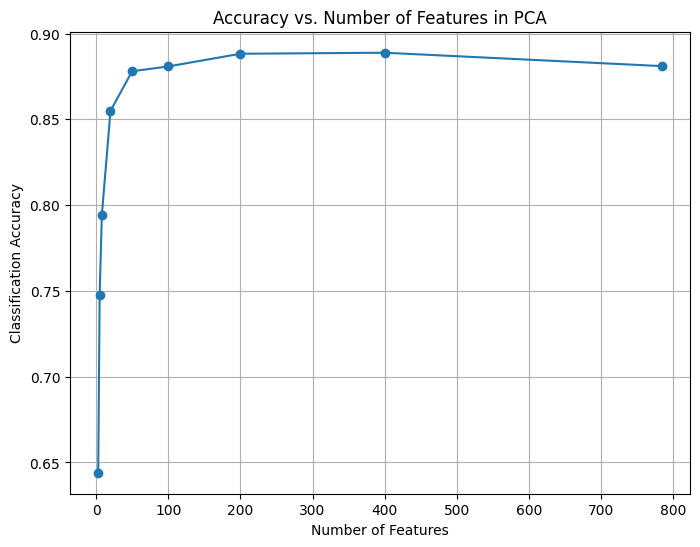

In [9]:
#Your code
from sklearn.preprocessing import StandardScaler
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

train_data, train_labels = next(iter(train_loader))
test_data, test_labels = next(iter(test_loader))

train_data, train_labels = train_data.numpy(), train_labels.numpy()
test_data, test_labels = test_data.numpy(), test_labels.numpy()


scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
def train_and_evaluate(train_data, train_labels, test_data, test_labels, input_dim):
    model = FashionMNISTClassifier(input_dim)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_tensor = torch.tensor(train_data, dtype=torch.float32)
    train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
    test_tensor = torch.tensor(test_data, dtype=torch.float32)
    test_labels_tensor = torch.tensor(test_labels, dtype=torch.long)

    batch_size = 64
    train_dataset = torch.utils.data.TensorDataset(train_tensor, train_labels_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    epochs = 5
    for epoch in range(epochs):
        model.train()
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        test_outputs = model(test_tensor)
        _, predicted = torch.max(test_outputs, 1)
        accuracy = (predicted == test_labels_tensor).sum().item() / len(test_labels_tensor)

    return accuracy


feature_counts = [3, 5, 8, 20, 50, 100, 200, 400, 784]
accuracies = []

for num_features in feature_counts:
    pca = PCA(n_components=num_features)
    train_data_reduced = pca.fit_transform(train_data)
    test_data_reduced = pca.transform(test_data)

    accuracy = train_and_evaluate(train_data_reduced, train_labels, test_data_reduced, test_labels, num_features)
    accuracies.append(accuracy)
    print(f"Features: {num_features}, Accuracy: {accuracy:.4f}")


plt.figure(figsize=(8, 6))
plt.plot(feature_counts, accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Features")
plt.ylabel("Classification Accuracy")
plt.title("Accuracy vs. Number of Features in PCA")
plt.grid()
plt.show()

  #Your code

### Now, what is the minimum number of features needed to achieve accuracy higher than 80 percent? As we see in the plot around 20 features.

### Could you predict this number according to the explained vaiance plot? why? The minimum number of features needed to exceed **80% accuracy** can be predicted using the **explained variance plot**. Here’s how:

1. Understanding the Connection Between Explained Variance and Accuracy**
- PCA reduces the dimensionality while preserving the most important variance in the dataset.
Classification accuracy is generally correlated with the retained variance:  
  - If too little variance is retained, essential information is lost, reducing accuracy.
  - If most variance is retained, accuracy approaches that of the full dataset (784 features).

- Typically, 80-90% of explained variance is needed for an accuracy above 80% in Fashion-MNIST.

2. Finding the Corresponding Number of Features
- Look at the explained variance plot (cumulative variance vs. number of components).
- Identify the smallest number of components that retains at least 80-90% variance.
- If 20 features were enough for 85.49% accuracy, the explained variance plot likely showed that 20 components capture around 85-90% of the variance.

3. Why This Works
- PCA ranks components based on variance, meaning the first few components capture the most crucial variations in the data.
- Since classification relies on preserving key discriminative information, a high variance retention percentage directly correlates with good classification performance.


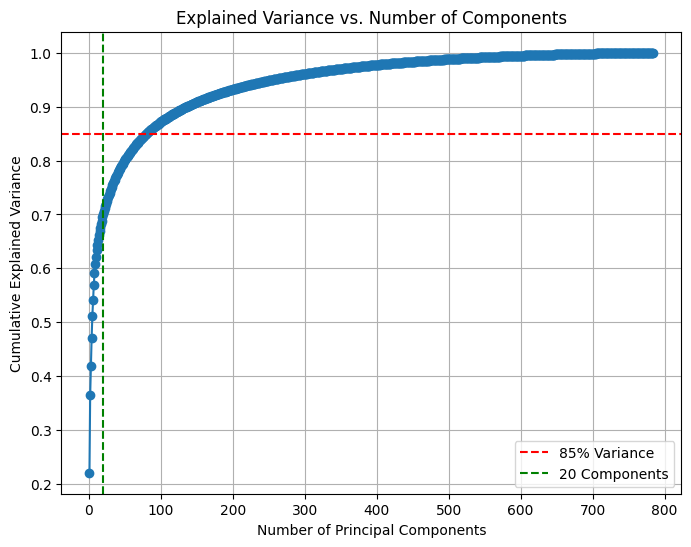

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)
train_data, _ = next(iter(train_loader))


train_data = train_data.numpy()
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)


pca = PCA().fit(train_data)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.85, color='r', linestyle='--', label="85% Variance")
plt.axvline(x=20, color='g', linestyle='--', label="20 Components")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.legend()
plt.grid()
plt.show()
